# 資料準備

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


# 建立模型

In [3]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
# 建立輸入層 x 

In [5]:
x = tf.placeholder("float", [None, 784])

In [6]:
# 建立隱藏層h1

In [7]:
h1=layer(output_dim=1000,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  


In [8]:
# 建立隱藏層h2

In [9]:
h2=layer(output_dim=1000,input_dim=1000,
         inputs=h1 ,activation=tf.nn.relu)  

In [10]:
# 建立輸出層

In [11]:
y_predict=layer(output_dim=10,input_dim=1000,
                inputs=h2,activation=None)

In [12]:
#建立訓練資料label真實值 placeholder

In [13]:
y_label = tf.placeholder("float", [None, 10])

# 定義訓練方式

In [14]:
#定義loss function

In [15]:
loss_function = tf.reduce_mean(
                   tf.nn.softmax_cross_entropy_with_logits
                       (logits=y_predict , 
                        labels=y_label))

In [16]:
#選擇optimizer

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

# 定義評估模型的準確率

In [18]:
#計算每一筆資料是否正確預測

In [19]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [20]:
#將計算預測正確結果，加總平均

In [21]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 開始訓練

In [22]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
for epoch in range(trainEpochs):

    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)        

Train Epoch: 01 Loss= 138.106369019  Accuracy= 0.9134
Train Epoch: 02 Loss= 89.688270569  Accuracy= 0.9368
Train Epoch: 03 Loss= 75.777366638  Accuracy= 0.943
Train Epoch: 04 Loss= 63.319149017  Accuracy= 0.952
Train Epoch: 05 Loss= 62.482894897  Accuracy= 0.9512
Train Epoch: 06 Loss= 60.911849976  Accuracy= 0.9516
Train Epoch: 07 Loss= 53.231006622  Accuracy= 0.96
Train Epoch: 08 Loss= 55.080513000  Accuracy= 0.9566
Train Epoch: 09 Loss= 58.513225555  Accuracy= 0.9584
Train Epoch: 10 Loss= 57.511035919  Accuracy= 0.9598
Train Epoch: 11 Loss= 47.860336304  Accuracy= 0.9664
Train Epoch: 12 Loss= 53.463111877  Accuracy= 0.9636
Train Epoch: 13 Loss= 51.504787445  Accuracy= 0.965
Train Epoch: 14 Loss= 50.694766998  Accuracy= 0.9676
Train Epoch: 15 Loss= 51.220470428  Accuracy= 0.9676
Train Finished takes: 558.5086631774902


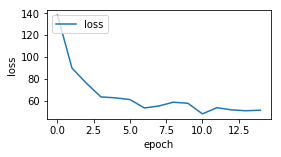

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

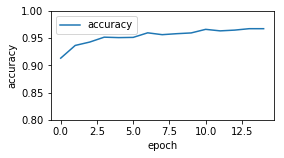

In [25]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 評估模型準確率

In [26]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images, 
                                      y_label: mnist.test.labels}))

Accuracy: 0.9637


# 進行預測

In [27]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })


In [28]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

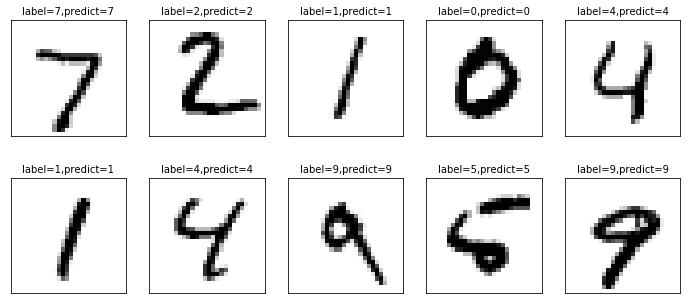

In [31]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

In [ ]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [ ]:
y_predict_Onehot[8]

# 找出預測錯誤

In [ ]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+"   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

In [ ]:
#sess.close()